<Axes: xlabel='households', ylabel='population'>

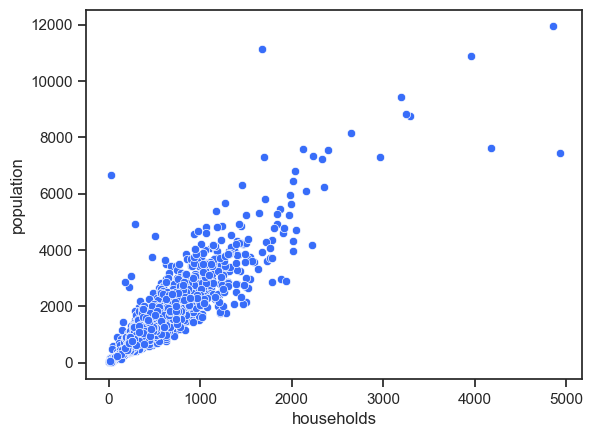

In [95]:
import pandas as pd
import seaborn as sns
import numpy as np

#1
df = pd.read_csv('california_housing_test.csv')

sns.set(style='ticks', context='notebook', palette = 'rainbow')
sns.scatterplot(
    x='households',
    y ='population',
    data = df
)

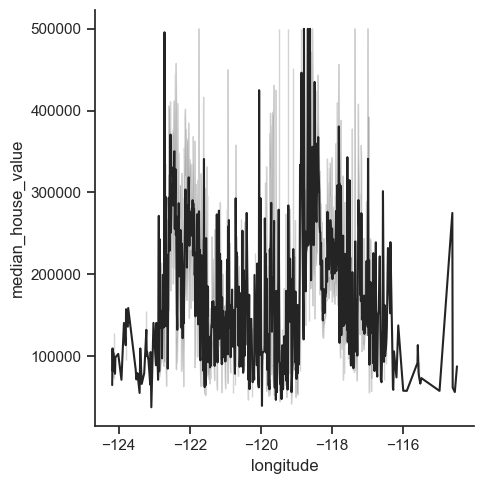

In [66]:
sns.relplot( x = 'longitude', y = 'median_house_value', kind = 'line', data = df)

<Axes: xlabel='housing_median_age', ylabel='Count'>

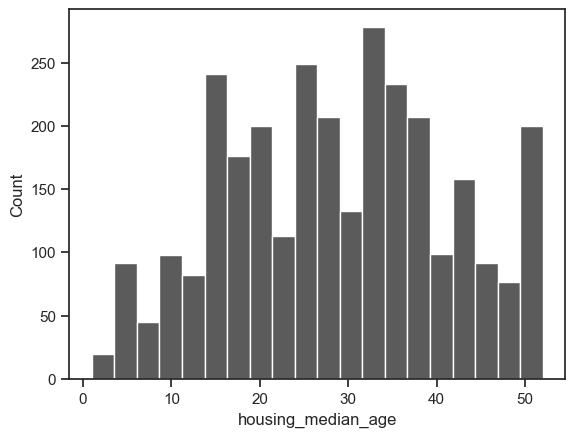

In [67]:
sns.histplot(data=df, x='housing_median_age')

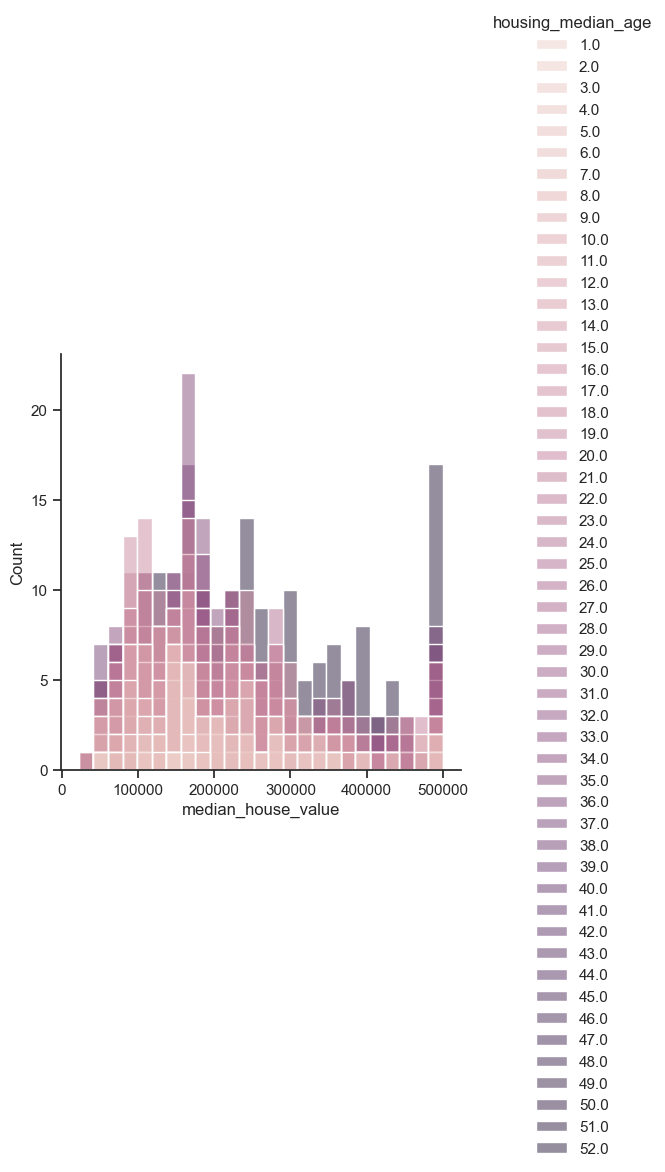

In [68]:
sns.displot(x = 'median_house_value', data = df, hue = "housing_median_age") # hue - объединяет данные гистограммы по параметру введеную в hue

## Задача No65. 
### Написать EDA для датасета про пингвинов Необходимо:
1. Использовать 2-3 точечных графика
2. Применить доп измерение в точечных графиках, используя аргументы hue, size, stile
3. Использовать PairGrid с типом графика на ваш выбор
4. Изобразить Heatmap
5. Использовать 2-3 гистограммы
penguins = sns.load_dataset("penguins")
                       penguins.head()

In [81]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [70]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

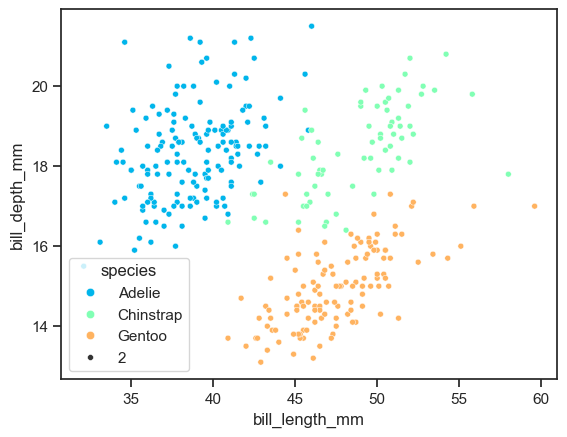

In [71]:

sns.scatterplot(x = 'bill_length_mm', y ='bill_depth_mm', data = penguins, palette = 'rainbow', hue = 'species', size = 2)

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

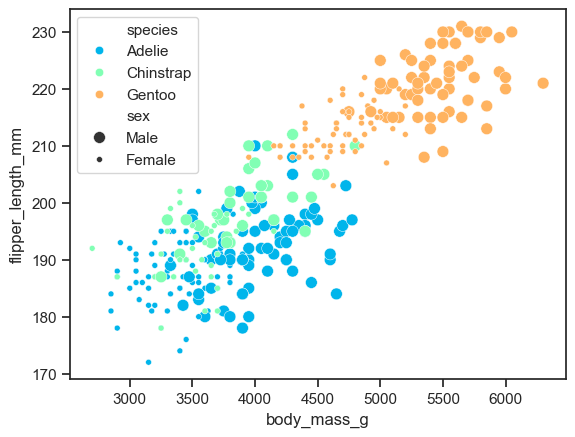

In [72]:
sns.scatterplot(x = 'body_mass_g', y ='flipper_length_mm', data = penguins, palette = 'rainbow', hue = 'species', size = 'sex')

## Использовать PairGrid с типом графика на ваш выбор


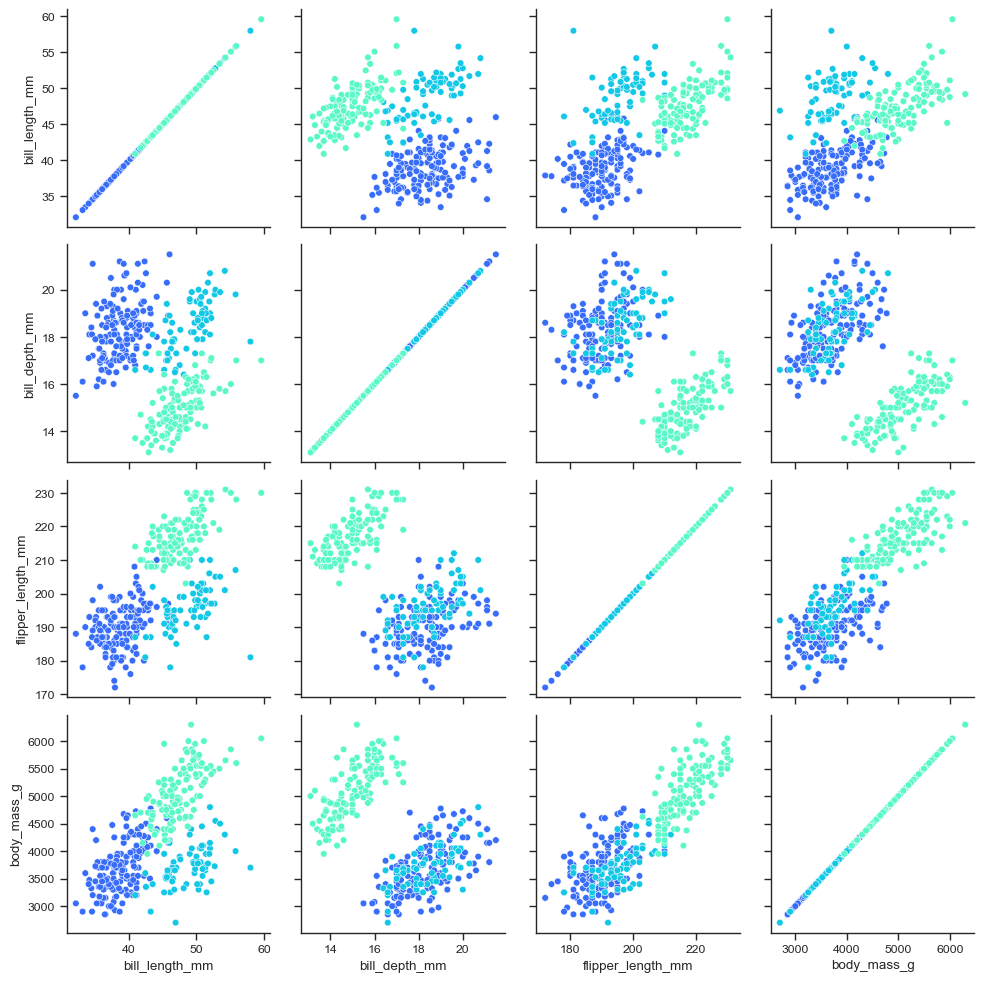

In [73]:
sns.set(style='ticks', context='paper', palette = 'rainbow')
g = sns.PairGrid(penguins, diag_sharey = False, hue = 'species')
g.map(sns.scatterplot)

## Изобразить Heatmap

<Axes: xlabel='island', ylabel='Count'>

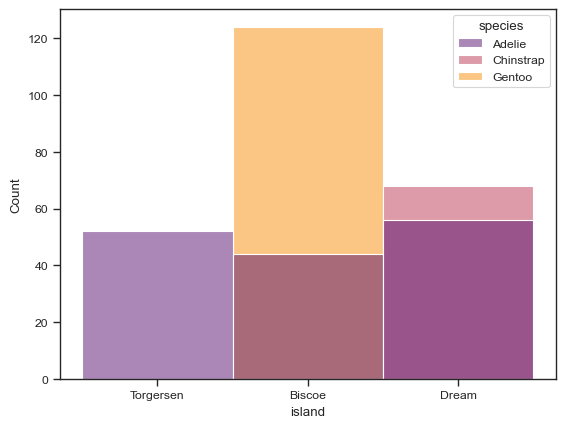

In [74]:
sns.histplot( data = penguins, x = 'island', hue = 'species', palette = 'inferno')

<Axes: >

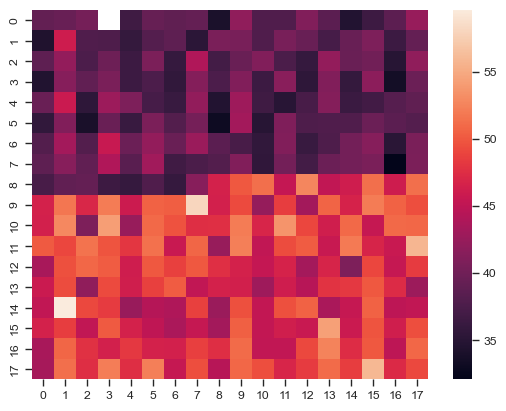

In [78]:
import numpy as np

lst_1 = list(penguins['bill_length_mm'])[:324]
lst_1 = np.array(lst_1).reshape((18,18))

sns.heatmap(data = lst_1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


<Axes: xlabel='height_group', ylabel='Count'>

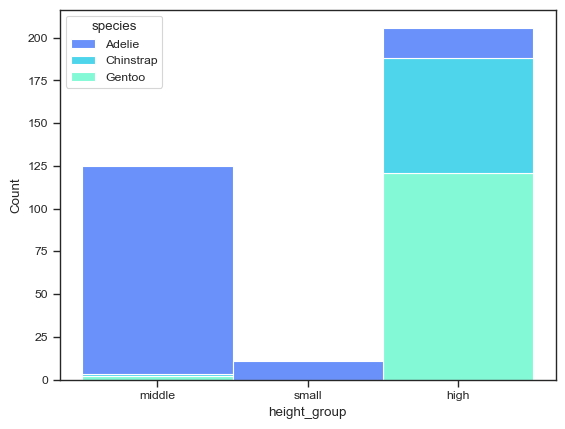

In [91]:
penguins.loc[penguins['bill_length_mm'] >= 42 , 'height_group'] = 'high'
penguins.loc[(penguins['bill_length_mm'] < 42) & (penguins['bill_length_mm'] > 35), 'height_group'] = 'middle'
penguins.loc[penguins['bill_length_mm'] <= 35 , 'height_group'] = 'small'

sns.histplot( data = penguins, x = 'height_group', hue = 'species', multiple="stack")